<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#NaN-Values" data-toc-modified-id="NaN-Values-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>NaN Values</a></span></li></ul></li><li><span><a href="#Variable-description" data-toc-modified-id="Variable-description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variable description</a></span></li><li><span><a href="#Variable-Analysis" data-toc-modified-id="Variable-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Variable Analysis</a></span><ul class="toc-item"><li><span><a href="#Bounce-Rate-per-Month" data-toc-modified-id="Bounce-Rate-per-Month-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Bounce Rate per Month</a></span></li><li><span><a href="#Visits-by-month-and-type" data-toc-modified-id="Visits-by-month-and-type-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Visits by month and type</a></span></li><li><span><a href="#Revenue-by-region" data-toc-modified-id="Revenue-by-region-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Revenue by region</a></span></li></ul></li></ul></li><li><span><a href="#PCA" data-toc-modified-id="PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PCA</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Data-Standardization" data-toc-modified-id="Data-Standardization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Standardization</a></span></li><li><span><a href="#Eigen-decomposition" data-toc-modified-id="Eigen-decomposition-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Eigen decomposition</a></span></li><li><span><a href="#Getting-Principal-Components" data-toc-modified-id="Getting-Principal-Components-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Getting Principal Components</a></span><ul class="toc-item"><li><span><a href="#Calculating-explained-variance" data-toc-modified-id="Calculating-explained-variance-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Calculating explained variance</a></span></li><li><span><a href="#PCA-with-scikit" data-toc-modified-id="PCA-with-scikit-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>PCA with scikit</a></span></li></ul></li></ul></li></ul></div>

<h1>Online Shopper Intention Analysis<span class="tocSkip"></span></h1>

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# EDA

In [2]:
df = pd.read_csv('datasets/online_shoppers_intention.csv')

## Data Cleaning

### NaN Values

In [3]:
# Looking for missing values across all columns
nancol = 0
for col in df.columns:
    if df[col].isnull().values.any():
        print(f"Column \"{col}\" contains {df[col].isnull().sum()} NaNs.")
        nancol += 1
if nancol == 0:
    print('No NaNs were found in any of the columns.')

No NaNs were found in any of the columns.


## Variable description

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another .


- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.


- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.


- The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.


- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.


- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.


- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.


- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

- **Administrative:** This is the number of pages of this type (administrative) that the user visited.
- **Administrative_Duration:** This is the amount of time spent in this category of pages.
- **Informational:** This is the number of pages of this type (informational) that the user visited.
- **Informational_Duration:** This is the amount of time spent in this category of pages.
- **ProductRelated:** This is the number of pages of this type (product related) that the user visited.
- **ProductRelated_Duration:** This is the amount of time spent in this category of pages.
- **BounceRates:** The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
- **ExitRates:** The percentage of pageviews on the website that end at that specific page.
- **PageValues:** The average value of the page averaged over the value of the target page and/or the completion of an eCommerce
- **SpecialDay:** This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the sessions are more likely to be finalized with transaction.
- **Month:** Contains the month the pageview occurred, in string form.
- **OperatingSystems:** An integer value representing the operating system that the user was on when viewing the page.
- **Browser:** An integer value representing the browser that the user was using to view the page.
- **Region:** An integer value representing which region the user is located in.
- **TrafficType:** An integer value representing what type of traffic the user is categorized into.
- **VisitorType:** A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
- **Weekend:** A boolean representing whether the session is on a weekend.
- **Revenue:** A boolean representing whether or not the user completed the purchase.

## Variable Analysis

C:\Users\ryl3r\AppData\Local\Temp\ipykernel_10404\122447038.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


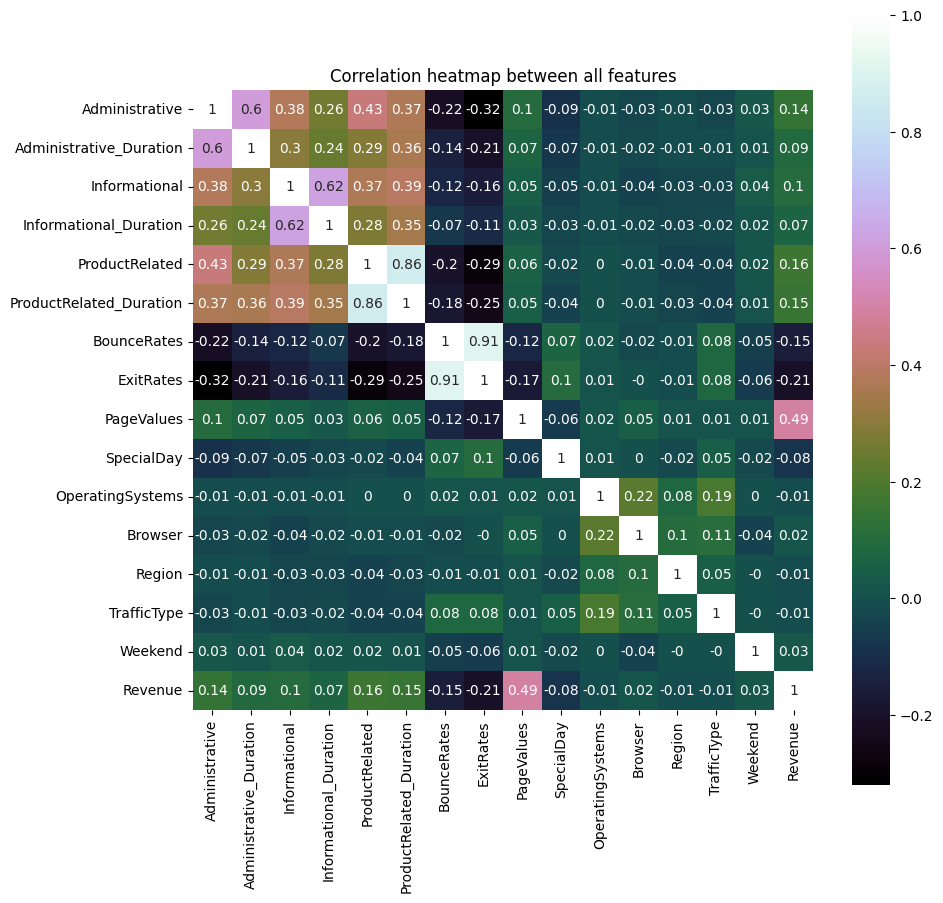

In [5]:
correlation = df.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation heatmap between all features')
plt.show()

### Bounce Rate per Month

In [6]:
groupped = df[['Month','BounceRates']].groupby('Month').mean()
groupped.rename({'June':'Jun'},inplace=True)

# Adding missing values with mean
mean_bounce = groupped['BounceRates'].mean()
rows = pd.DataFrame({'BounceRates':mean_bounce}, index=['Jan','Apr'])
groupped = pd.concat([groupped, rows])

# Re-index
idx = pd.to_datetime(groupped.index, format='%b').month
groupped.set_index(idx,inplace=True, drop=True)
groupped.sort_index(inplace=True)
idx = pd.to_datetime(groupped.index, format='%m').month_name()
groupped.set_index(idx,inplace=True, drop=True)
groupped

,BounceRates
January,0.023705
February,0.047021
March,0.021728
April,0.023705
May,0.026867
June,0.035102
July,0.024676
August,0.018211
September,0.012183
October,0.011849


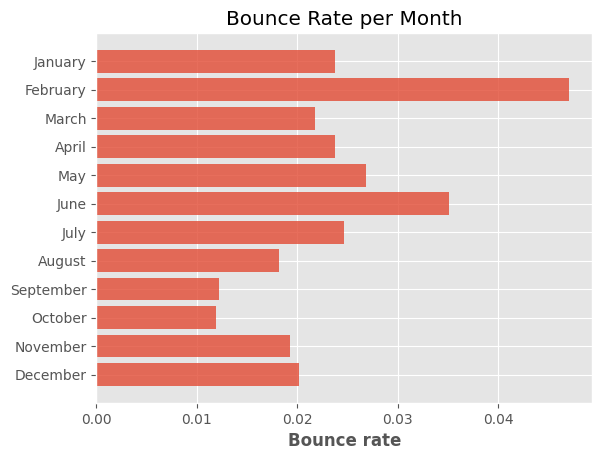

In [7]:
y_pos = np.arange(12)
plt.style.use('ggplot')
plt.barh(y_pos, groupped.BounceRates, align='center', alpha=0.8)
plt.yticks(y_pos,groupped.index)
plt.xlabel('Bounce rate', fontweight='bold')
plt.title('Bounce Rate per Month')
plt.gca().invert_yaxis()
plt.show()

### Visits by month and type

In [8]:
groupped = df[['Month','Administrative','Informational','ProductRelated']].groupby('Month').mean()
groupped.rename({'June':'Jun'},inplace=True)
groupped

# # Adding missing values with mean
mean_admin = groupped['Administrative'].mean()
mean_infor = groupped['Informational'].mean()
mean_prod = groupped['ProductRelated'].mean()
rows = pd.DataFrame({'Administrative':mean_admin,
                    'Informational':mean_infor,
                    'ProductRelated':mean_prod}, index=['Jan','Apr'])
groupped = pd.concat([groupped, rows])

# # Re-index
idx = pd.to_datetime(groupped.index, format='%b').month
groupped.set_index(idx,inplace=True, drop=True)
groupped.sort_index(inplace=True)
idx = pd.to_datetime(groupped.index, format='%m').month_name()
groupped.set_index(idx,inplace=True, drop=True)
groupped

,Administrative,Informational,ProductRelated
January,2.409838,0.476685,30.891811
February,0.543478,0.086957,11.184783
March,1.887782,0.420556,19.808600
April,2.409838,0.476685,30.891811
May,1.964923,0.423900,26.487812
June,2.274306,0.562500,36.065972
July,2.423611,0.516204,36.407407
August,3.136259,0.542725,38.258661
September,3.334821,0.566964,33.104911
October,3.719490,0.488160,33.566485


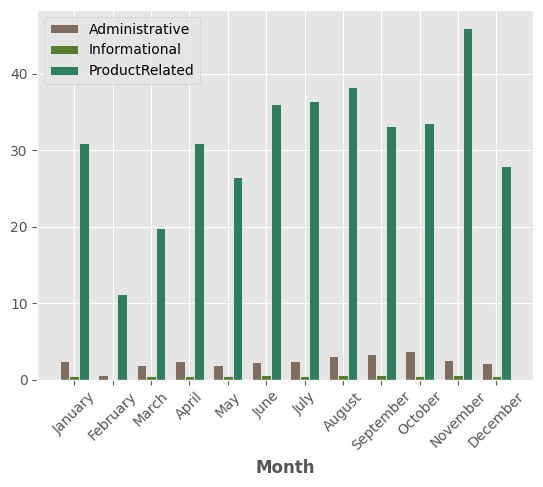

In [9]:
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(groupped['Administrative']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, groupped['Administrative'], color='#7f6d5f', width=barWidth, edgecolor='white', label='Administrative')
plt.bar(r2, groupped['Informational'], color='#557f2d', width=barWidth, edgecolor='white', label='Informational')
plt.bar(r3, groupped['ProductRelated'], color='#2d7f5e', width=barWidth, edgecolor='white', label='ProductRelated')
 
# Add xticks on the middle of the group bars
plt.xlabel('Month', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(groupped['Administrative']))], groupped.index, rotation = 45)
 
# Create legend & Show graphic
plt.legend()
plt.show()

### Revenue by region

In [10]:
groupped = df[['Revenue','Region','Administrative']].groupby(['Region','Revenue']).count()
groupped.rename({'Administrative':'Count'}, axis=1, inplace=True)
groupped = groupped.reset_index(level=['Revenue'])  
groupped

,Revenue,Count
Region,,
1,False,4009
1,True,771
2,False,948
2,True,188
3,False,2054
3,True,349
4,False,1007
4,True,175
5,False,266


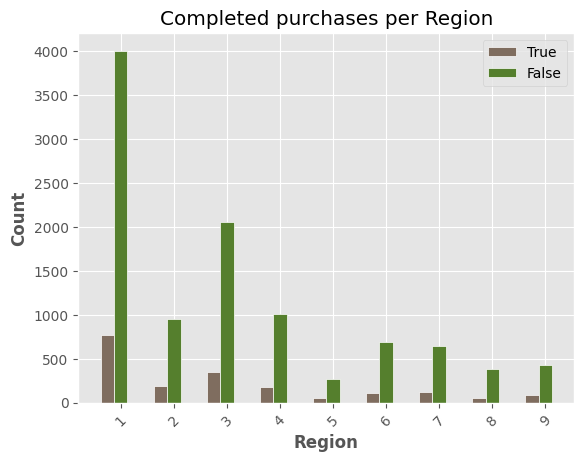

In [11]:
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(groupped[groupped['Revenue'] == True]))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, groupped['Count'][groupped['Revenue'] == True], color='#7f6d5f', width=barWidth, edgecolor='white', label='True')
plt.bar(r2, groupped['Count'][groupped['Revenue'] == False], color='#557f2d', width=barWidth, edgecolor='white', label='False')
 
# Add xticks on the middle of the group bars
plt.xlabel('Region', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Completed purchases per Region')
plt.xticks([r + barWidth for r in range(len(groupped.index.unique()))], groupped.index.unique(), rotation = 45)
 
# Create legend & Show graphic
plt.legend()
plt.show()

# PCA

## Preparation

In [12]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [13]:
# Changing month format
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [14]:
df.replace({'June':'Jun'},inplace=True)
df['Month'] = pd.to_datetime(df['Month'], format='%b').dt.month

In [15]:
# Changing visitor format
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [16]:
df.replace({'Returning_Visitor':0,'New_Visitor':1,'Other':2},inplace=True)

In [17]:
# Moving label column to the front
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Revenue')))
df = df.reindex(columns= cols)

In [18]:
df.head()

,Revenue,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,False,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,False
1,False,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,False
2,False,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,False
3,False,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,False
4,False,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,True


In [19]:
# Creating label vector and matrix of features
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
print(f'Number of features: {np.shape(X)[1]}')
print(f'Number of observactions: {np.shape(X)[0]}')

Number of features: 17
Number of observactions: 12330


## Data Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

In [21]:
# Corvariance matrix
cov_mat = np.cov(X_std.T)

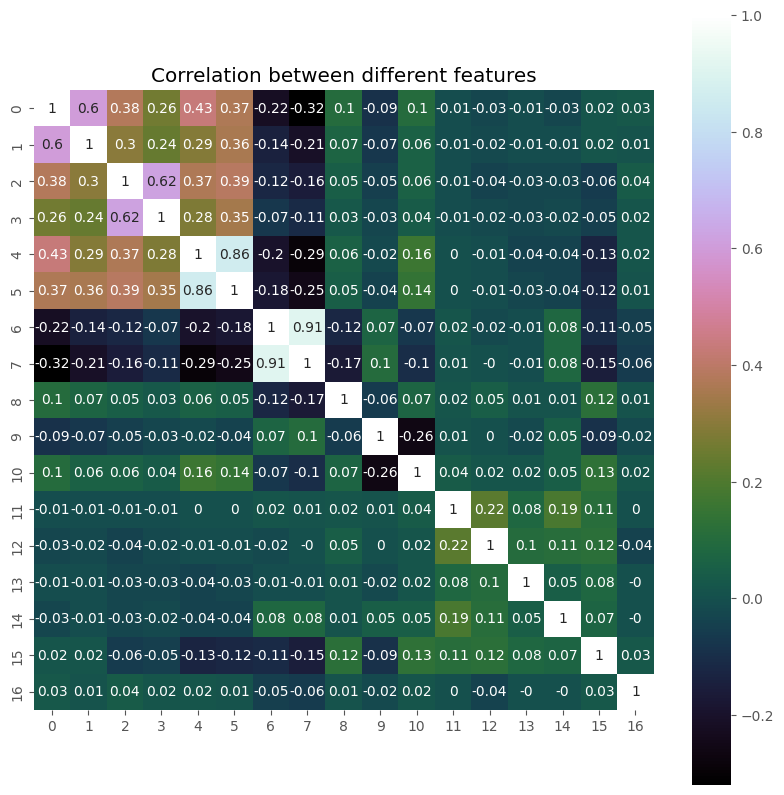

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(cov_mat.round(2), vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features')
plt.show()

## Eigen decomposition

In [23]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print(f'Eigenvectors \n{eig_vecs}')
print(f'\nEigenvalues \n{eig_vals}')


Eigenvalues 
[3.44440851 1.80612373 0.07627189 0.12258761 1.48126138 0.35146237
 0.42083143 1.22012856 0.66988978 1.09788253 0.75219619 0.79260807
 0.87422221 0.92031357 1.01647894 0.98473953 0.96997257]


## Getting Principal Components

In [24]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

### Calculating explained variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [25]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

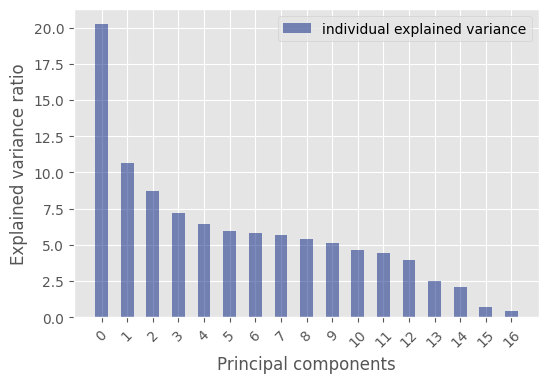

In [26]:
with plt.style.context('seaborn-dark-palette'):
    r = range(len(eig_vals))
    plt.figure(figsize=(6, 4))
    barWidth = 0.5
    plt.bar(r, var_exp, alpha=0.5, align='center',
            label='individual explained variance', width=barWidth)
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.xticks(r, rotation = 45)

### PCA with scikit

In [27]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_std)
for idx, pc in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    print(f'Component {idx} - {pc:.4}')

Component 0 - 0.2026
Component 1 - 0.3088
Component 2 - 0.396
Component 3 - 0.4677
Component 4 - 0.5323
Component 5 - 0.5921
Component 6 - 0.65
Component 7 - 0.7071
Component 8 - 0.7612
Component 9 - 0.8126
Component 10 - 0.8592
Component 11 - 0.9035
Component 12 - 0.9429
Component 13 - 0.9676
Component 14 - 0.9883
Component 15 - 0.9955
Component 16 - 1.0


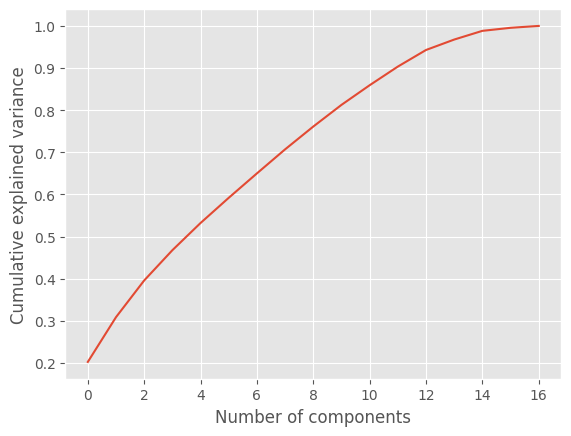

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

The above plot shows almost 90% variance by the first 10 components. Therfore we can drop the remaining components.

In [29]:
reduced_pca = PCA(n_components=10)
reduced_Y = reduced_pca.fit_transform(X_std)

In [30]:
reduced_Y.shape

(12330, 10)

# K Nearest Neighbor Algorithm

## Libraries used

In [31]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import sklearn

### Definitions

In [32]:
def k_nearest_neighbor(training_data, label_data, testing_data, k_num):
    """Returns predicted labels using KNN algorithm

    Args:
    training_data :: data used to train the model
    label_data :: label data used to train the model
    testing_data :: test data the model will predict
    k_num :: value of K number

    Returns:
    Predicted Label :: Boolean array
    """
    knn = neighbors.KNeighborsClassifier(k_num, weights = 'uniform', algorithm = 'auto')
    # trains the set
    knn.fit(training_data, label_data)
    # predicts the set
    predicted_output = knn.predict(testing_data)

    return predicted_output


def get_accuracy(test_label, predicted_label):
    """Returns total accuracy between predicted label and test label

    Args:
    test_label :: label data of the actual value
    predicted label :: label data of the predicted value

    Returns:
    Accuracy :: float
    """
    correct = np.sum(test_label == predicted_label)/len(test_label)

    return correct

## Predicting with PCA

In [33]:
label_data = df["Revenue"]

# Splitting data for training set, test size of 0.2
x_train, x_test, y_train, y_test = train_test_split(reduced_Y, label_data, test_size = 0.2, random_state = 3)

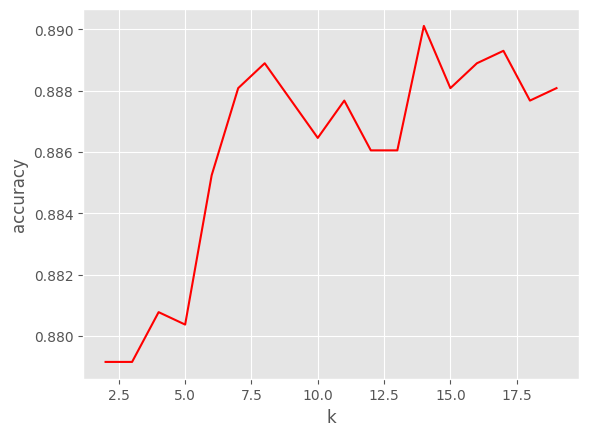

In [34]:
total_accuracy = []  # Create an empty list of accuracy rates

k_value = range(2, 20)
for k in k_value:
    y_predict = k_nearest_neighbor(x_train, y_train, x_test, k)
    accuracy = get_accuracy(y_test, y_predict)
    total_accuracy.append(accuracy)

plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(k_value, total_accuracy, c='r')
plt.grid(True)  # Add grid

## Predicting without PCA

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X_std, label_data, test_size = 0.2, random_state = 3)

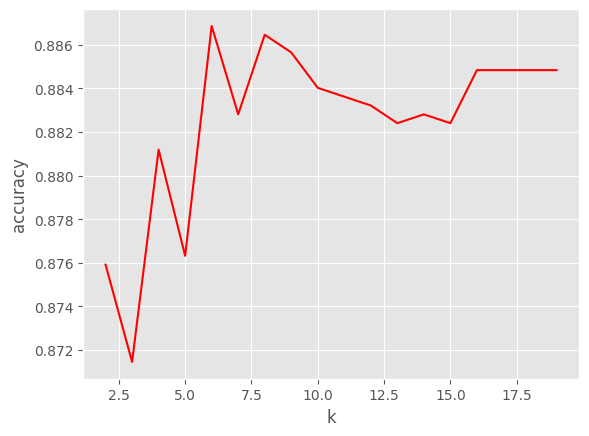

In [36]:
total_accuracy = []  # Create an empty list of accuracy rates

k_value = range(2, 20)
for k in k_value:
    y_predict = k_nearest_neighbor(x_train, y_train, x_test, k)
    accuracy = get_accuracy(y_test, y_predict)
    total_accuracy.append(accuracy)

plt.xlabel("k")
plt.ylabel("accuracy")
plt.plot(k_value, total_accuracy, c='r')
plt.grid(True)  # Add grid